# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [ ]:
# imports
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
ruta = "/content/dataset_banco_clean.csv"
data = pd.read_csv(ruta)

In [ ]:
print(data.shape)
data.head()

(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

## 1. Análisis univariante

<ipython-input-6-382170a925f7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='age', data=data, palette=colors)


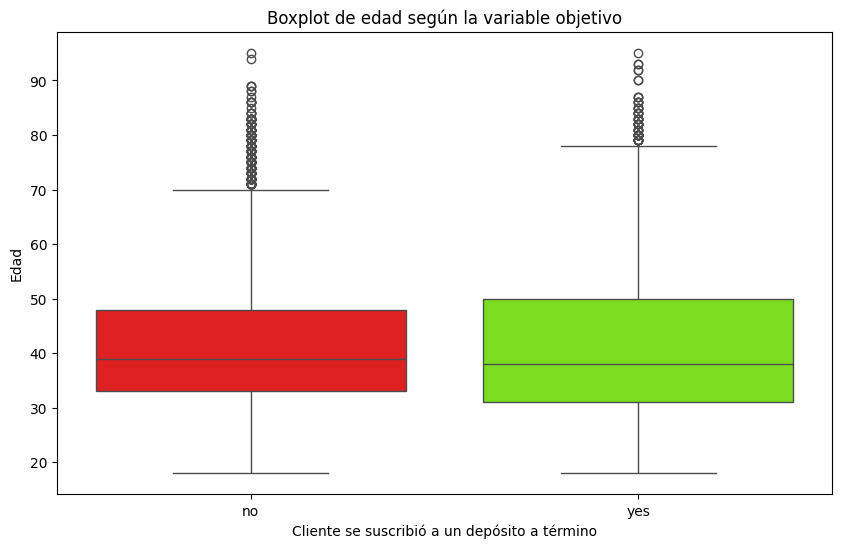

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#FF0000", "#7CFC00"]

# Boxplot de la variable edad (age) según la variable objetivo (y)
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='age', data=data, palette=colors)
plt.title('Boxplot de edad según la variable objetivo')
plt.xlabel('Cliente se suscribió a un depósito a término')
plt.ylabel('Edad')
plt.show()


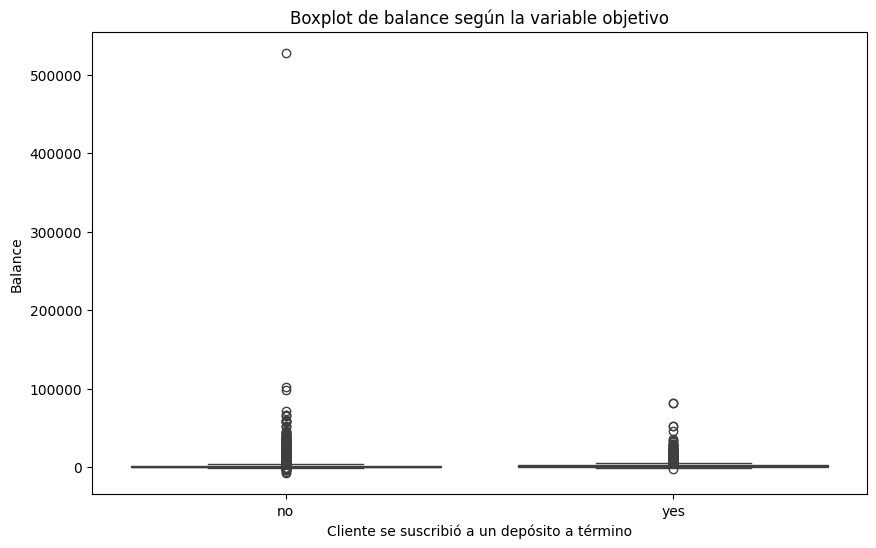

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot de la variable balance según la variable objetivo (y)
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='balance', data=data)
plt.title('Boxplot de balance según la variable objetivo')
plt.xlabel('Cliente se suscribió a un depósito a término')
plt.ylabel('Balance')
plt.show()



Después de representar los boxplots de los datos, específicamente examinando la relación entre la variable "edad" y la variable objetivo "y" (si el cliente se suscribió a un depósito a término), así como también la relación entre la variable "balance" (saldo promedio anual en euros) y la variable objetivo "y", podemos concluir que no existen diferencias significativas en estas variables en relación con la suscripción al depósito.

Al observar el boxplot de la variable "edad" en función de la variable objetivo, no se aprecian diferencias notables en la distribución de edades entre los clientes que se suscribieron y los que no lo hicieron. Además, al examinar la variable "balance", tampoco se evidencian discrepancias marcadas en los saldos promedio anuales entre los dos grupos de clientes.

Esta conclusión sugiere que la edad y el balance no son factores determinantes o discriminantes para predecir la suscripción al depósito a término.

#### *Age*

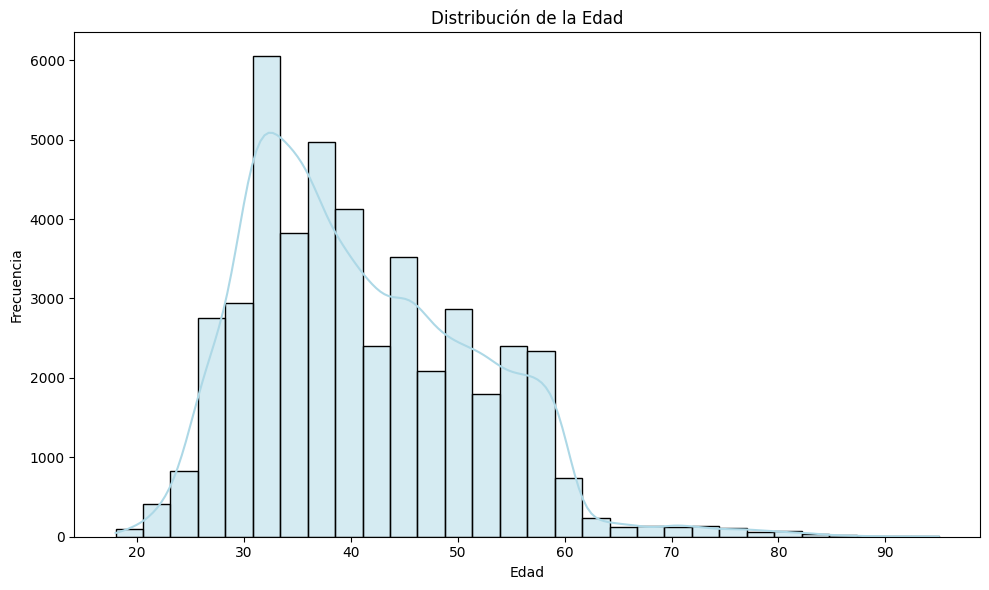

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', bins=30, kde=True, color='lightblue')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad')
plt.tight_layout()
plt.show()

y    conversion_rate
age                 
18          0.583333
19          0.314286
20          0.300000
21          0.278481
22          0.310078
..               ...
90               NaN
92               NaN
93               NaN
94               NaN
95          0.500000

[77 rows x 1 columns]


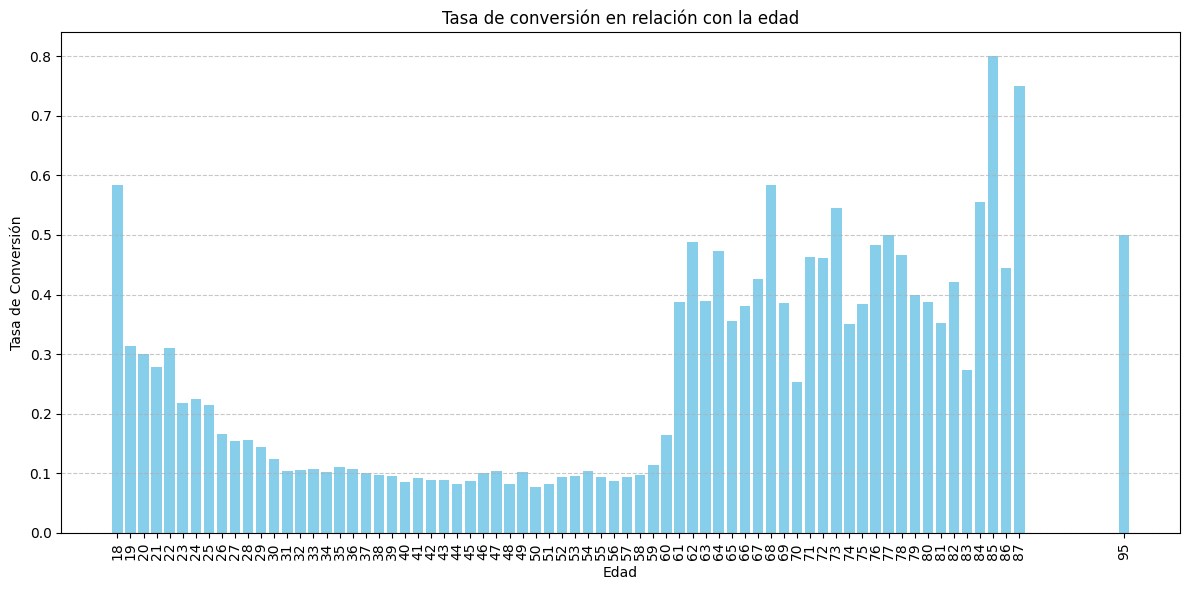

In [ ]:
# Calcular el número de clientes suscritos y no suscritos en cada grupo de edad
age_conversion = data.groupby(['age', 'y']).size().unstack()

# Calcular la tasa de conversión para cada grupo de edad
age_conversion['conversion_rate'] = age_conversion['yes'] / (age_conversion['yes'] + age_conversion['no'])

# Mostrar la tasa de conversión en relación con la edad
print(age_conversion[['conversion_rate']])

# Eliminar las filas con valores NaN
age_conversion_cleaned = age_conversion.dropna()

# Graficar la tasa de conversión en relación con la edad
plt.figure(figsize=(12, 6))
plt.bar(age_conversion_cleaned.index, age_conversion_cleaned['conversion_rate'], color='skyblue')
plt.title('Tasa de conversión en relación con la edad')
plt.xlabel('Edad')
plt.ylabel('Tasa de Conversión')
plt.xticks(age_conversion_cleaned.index, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



<ipython-input-9-5d2190690e4f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='conversion_rate', data=age_group_conversion, palette=palette)


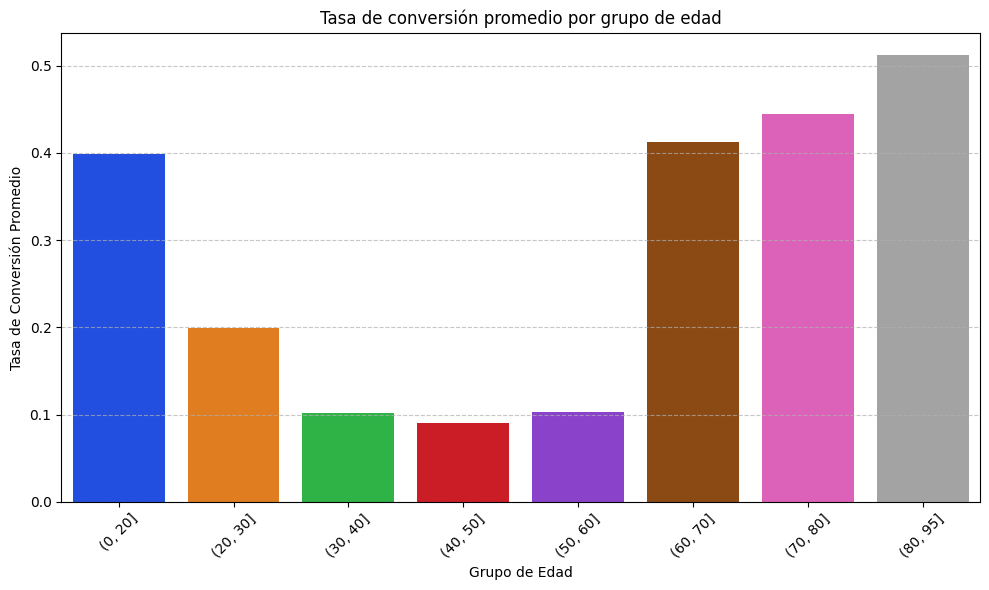

In [ ]:
# Rangos de edad
bins = [0, 20, 30, 40, 50, 60, 70, 80, 95]
age_conversion['age_group'] = pd.cut(age_conversion.index, bins)

# Calcular la tasa de conversión promedio para cada grupo de edad
age_group_conversion = age_conversion.groupby('age_group')['conversion_rate'].mean().reset_index()

palette = "bright"
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='conversion_rate', data=age_group_conversion, palette=palette)
plt.title('Tasa de conversión promedio por grupo de edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Tasa de Conversión Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Tras representar en los gráficos la tasa de conversión por edad, se puede observar que los más jóvenes, aquellos que se encuentran en el grupo de edad de 18-20 años son junto a aquellos que son agrupados en los grupos de a partir de 60 años, los que muestran una tasa de conversión más elevada. Lo que hace que la tasa de convesión del grupo de los jóvenes sea una de las más altas se debe principalmente a los individuos de 18 años, como hemoos podido observar en el gráfico desglosado por edades sin agrupar,con una tasa de conversión próxima al 0.6.

#### *Job*

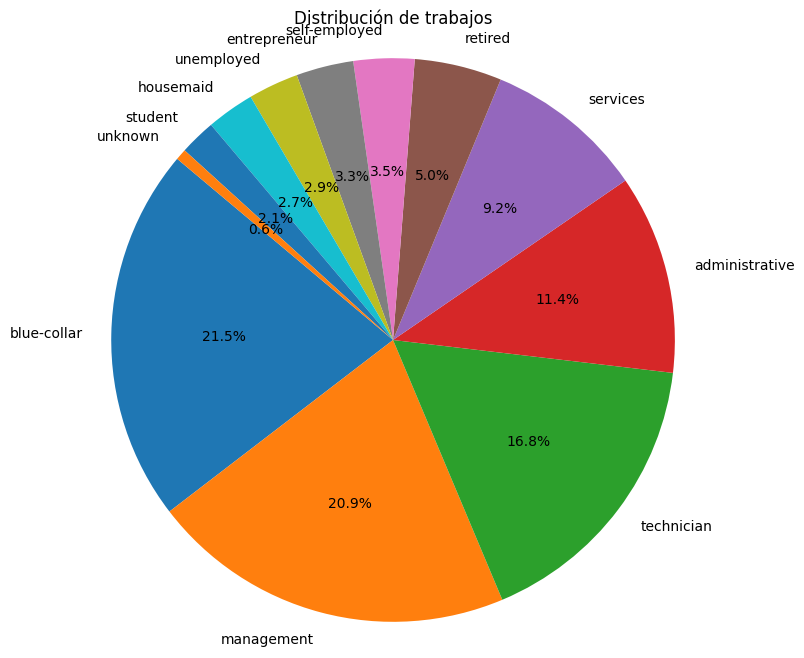

In [ ]:
import matplotlib.pyplot as plt

job_counts = data['job'].value_counts()

labels = job_counts.index
sizes = job_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio garantiza que el gráfico sea circular
plt.title('Distribución de trabajos')
plt.show()


y               conversion_rate
job                            
administrative         0.122098
blue-collar            0.072684
entrepreneur           0.082773
housemaid              0.087903
management             0.137493
retired                0.227574
self-employed          0.118504
services               0.088873
student                0.287086
technician             0.110511
unemployed             0.155027
unknown                0.118056


<ipython-input-10-d476b6812125>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_conversion.index, y='conversion_rate', data=job_conversion, palette=palette)


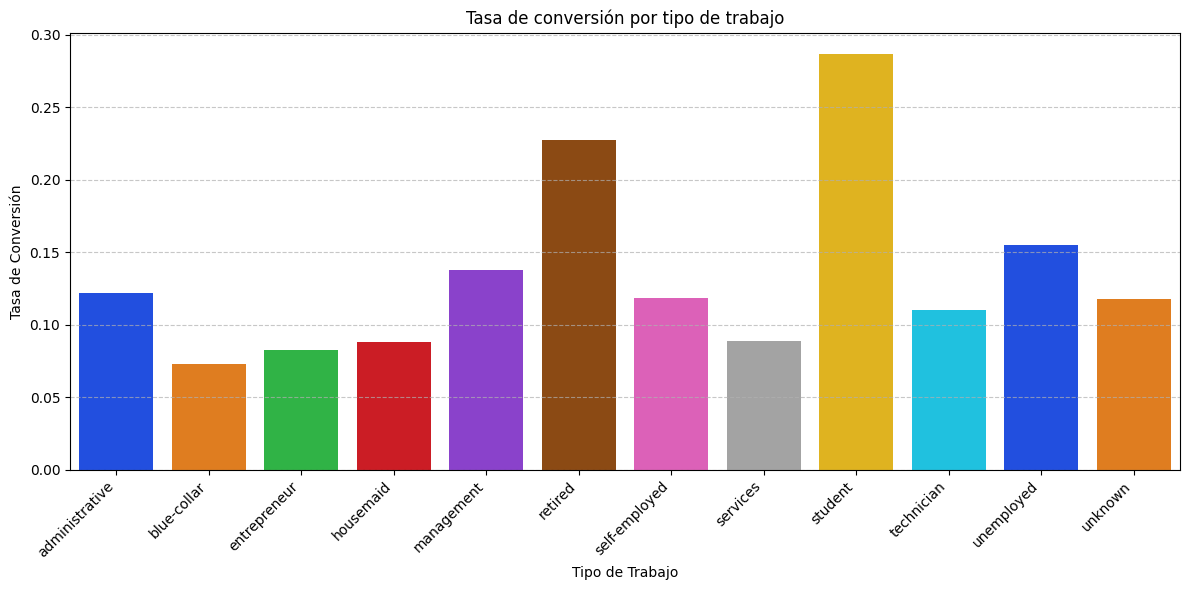

In [ ]:
# Calcular el número de clientes suscritos y no suscritos en cada categoría de trabajo
job_conversion = data.groupby(['job', 'y']).size().unstack()

# Calcular la tasa de conversión para cada categoría de trabajo
job_conversion['conversion_rate'] = job_conversion['yes'] / (job_conversion['yes'] + job_conversion['no'])

print(job_conversion[['conversion_rate']])

palette = "bright"
plt.figure(figsize=(12, 6))
sns.barplot(x=job_conversion.index, y='conversion_rate', data=job_conversion, palette=palette)
plt.title('Tasa de conversión por tipo de trabajo')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Tasa de Conversión')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Tras analizar la variable que muestra el tipo de trabajo de los individuos nos ayuda a reforzar las conclusiones sacadas tras representar la edad, mostrandoo que las tasas más altas de conversión son aquellas que pertenecen a los estudiantes y jubilados, superando ambas el 0.2 mientras que el resto de trabajos se sitúan entre 0.07-0.15 aproximadamente.

#### *Marital*

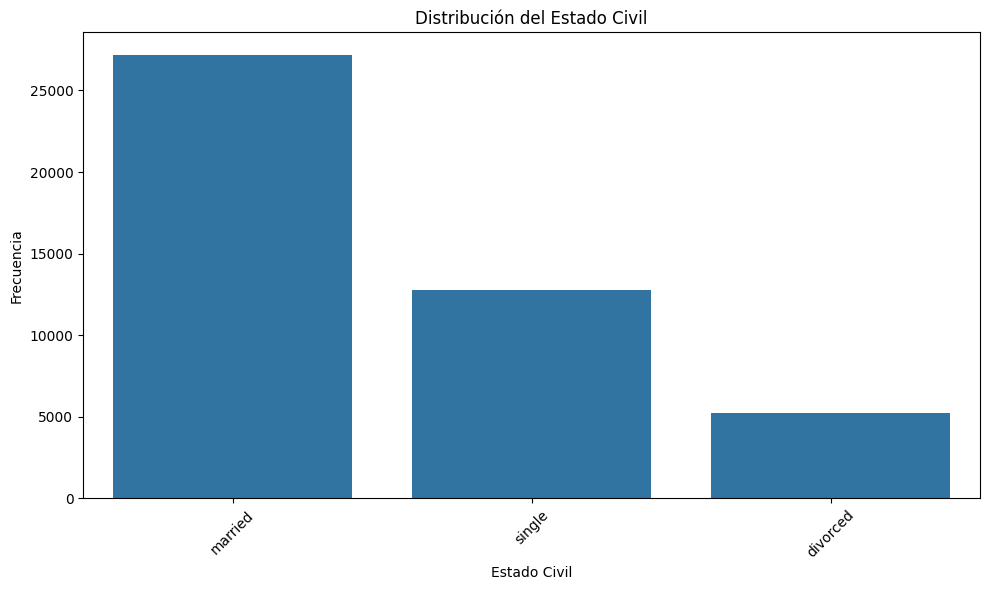

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='marital')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.title('Distribución del Estado Civil')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



y         conversion_rate
marital                  
divorced         0.119523
married          0.101176
single           0.149472


<ipython-input-13-b27f78d6024e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_conversion.index, y='conversion_rate', data=marital_conversion, palette=palette)


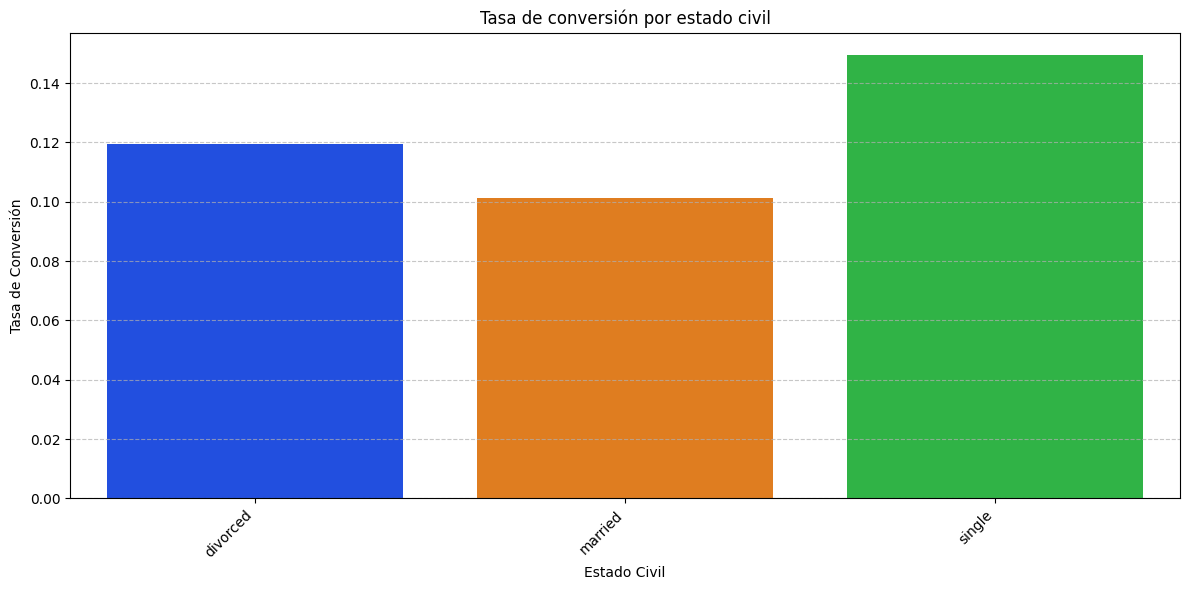

In [ ]:
# Calcular el número de clientes suscritos y no suscritos en cada categoría de trabajo
marital_conversion = data.groupby(['marital', 'y']).size().unstack()

# Calcular la tasa de conversión para cada categoría de trabajo
marital_conversion['conversion_rate'] = marital_conversion['yes'] / (marital_conversion['yes'] + marital_conversion['no'])

print(marital_conversion[['conversion_rate']])

palette = "bright"
plt.figure(figsize=(12, 6))
sns.barplot(x=marital_conversion.index, y='conversion_rate', data=marital_conversion, palette=palette)
plt.title('Tasa de conversión por estado civil')
plt.xlabel('Estado Civil')
plt.ylabel('Tasa de Conversión')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

En cuanto a la variable que nos permite mostrar el estado civil de los individuos, tras los resultados de los gráficos, podríamos concluir que esta variable no es muy relevante ya que los resultados son muy similares de aquellos que optan por contratar el depósito a término, ya que las tres se mueven entorno al 0.10 - 0.15 .

#### *Education*

<ipython-input-15-2aa75a66dada>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='education', palette='Set2')  # Selecciona una paleta de colores


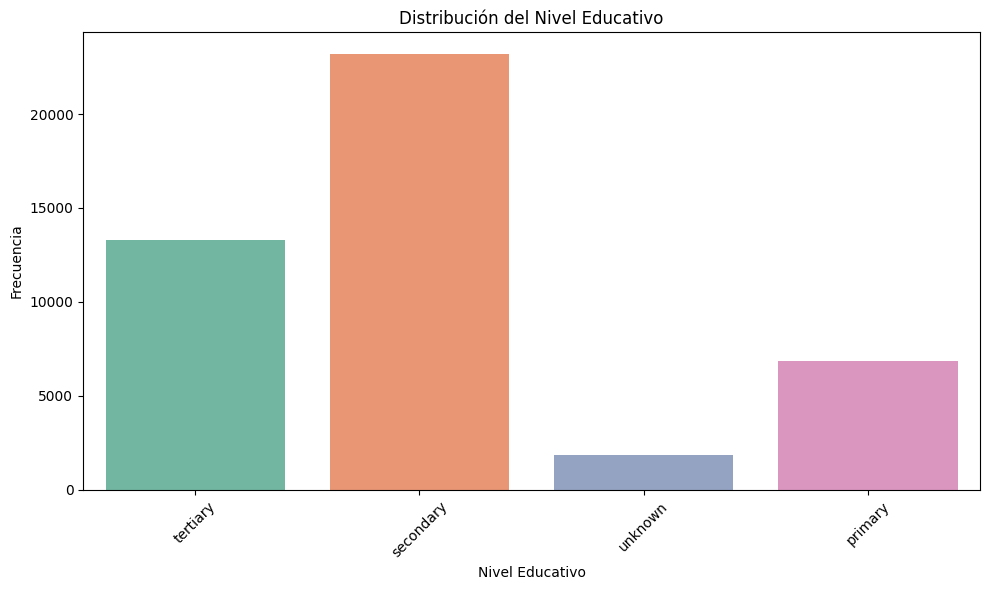

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='education', palette='Set2')
plt.xlabel('Nivel Educativo')
plt.ylabel('Frecuencia')
plt.title('Distribución del Nivel Educativo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-20-975ceb0ea4bb>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='education', y='conversion_rate', data=conversion_education, palette='viridis')


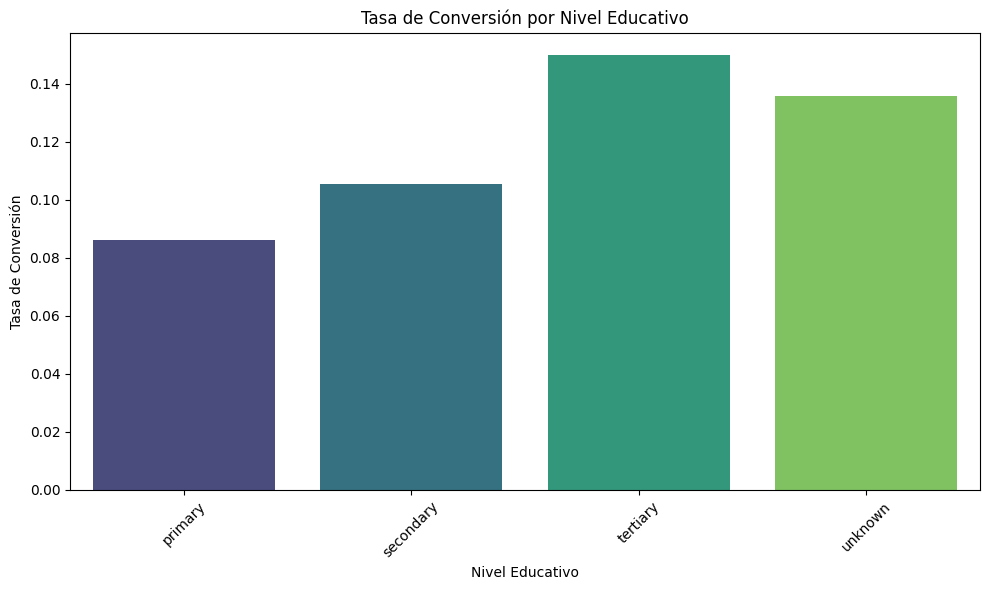

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ruta = "/content/dataset_banco_clean.csv"
data = pd.read_csv(ruta)

# Convertir la columna 'y' a tipo numérico
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Calcular la tasa de conversión por nivel educativo
conversion_education = data.groupby('education')['y'].mean().reset_index()

conversion_education = conversion_education.rename(columns={'y': 'conversion_rate'})

plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='conversion_rate', data=conversion_education, palette='viridis')
plt.title('Tasa de Conversión por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Tasa de Conversión')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



El análisis revela una tendencia clara: a medida que el nivel educativo de los individuos aumenta, también lo hace la tasa de conversión. Por tanto, esta variable podría desempeñar un papel significativo como predictor en el modelo.

#### *Default*

y        conversion_rate
default                 
no              0.117929
yes             0.063804


<ipython-input-16-dc9c32216352>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_conversion.index, y='conversion_rate', data=default_conversion, palette='bright')


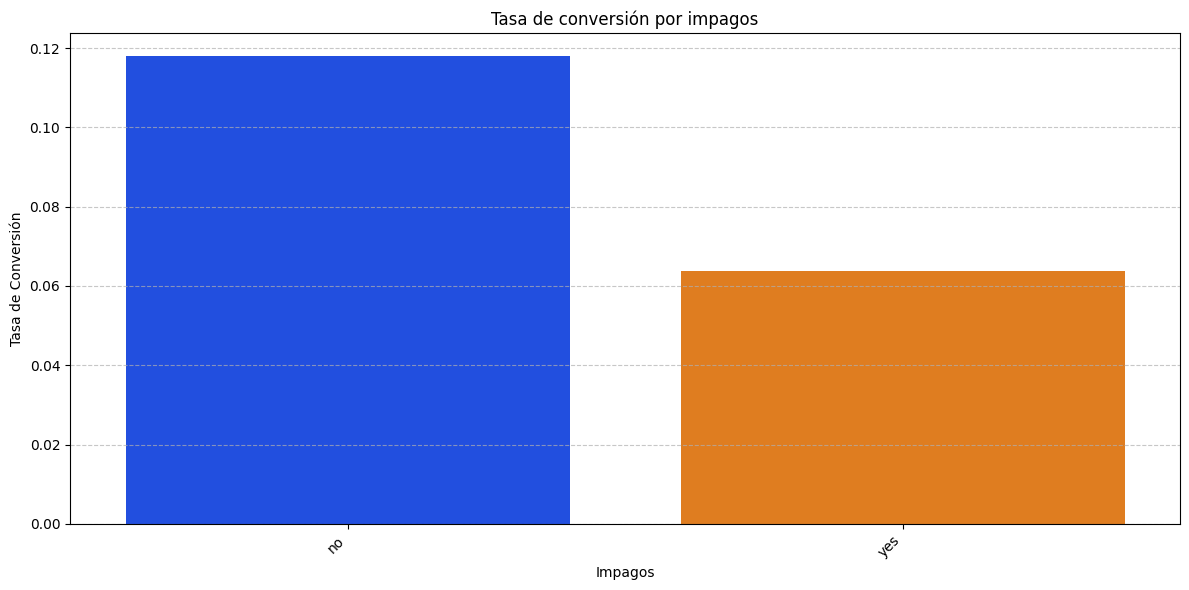

In [ ]:
# Calcular el número de clientes suscritos y no suscritos en cada categoría de default
default_conversion = data.groupby(['default', 'y']).size().unstack()

# Calcular la tasa de conversión para cada categoría de default
default_conversion['conversion_rate'] = default_conversion['yes'] / (default_conversion['yes'] + default_conversion['no'])
print(default_conversion[['conversion_rate']])

plt.figure(figsize=(12, 6))
sns.barplot(x=default_conversion.index, y='conversion_rate', data=default_conversion, palette='bright')
plt.title('Tasa de conversión por impagos')
plt.xlabel('Impagos')
plt.ylabel('Tasa de Conversión')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


La variable que indica la presencia de impagos podría ser considerada como un predictor significativo, dado que la tasa de conversión entre aquellos individuos que optan por contratar el depósito es notablemente mayor en comparación con aquellos que tienen registros de impagos.

#### *Balance*

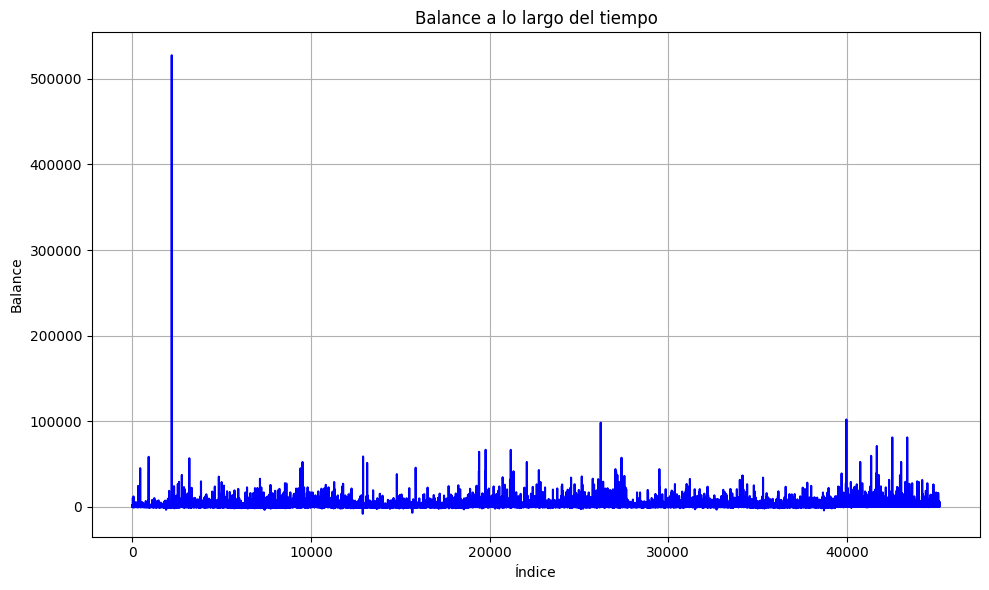

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=data['balance'], color='blue')
plt.xlabel('Índice')
plt.ylabel('Balance')
plt.title('Balance a lo largo del tiempo')
plt.grid(True)
plt.tight_layout()
plt.show()



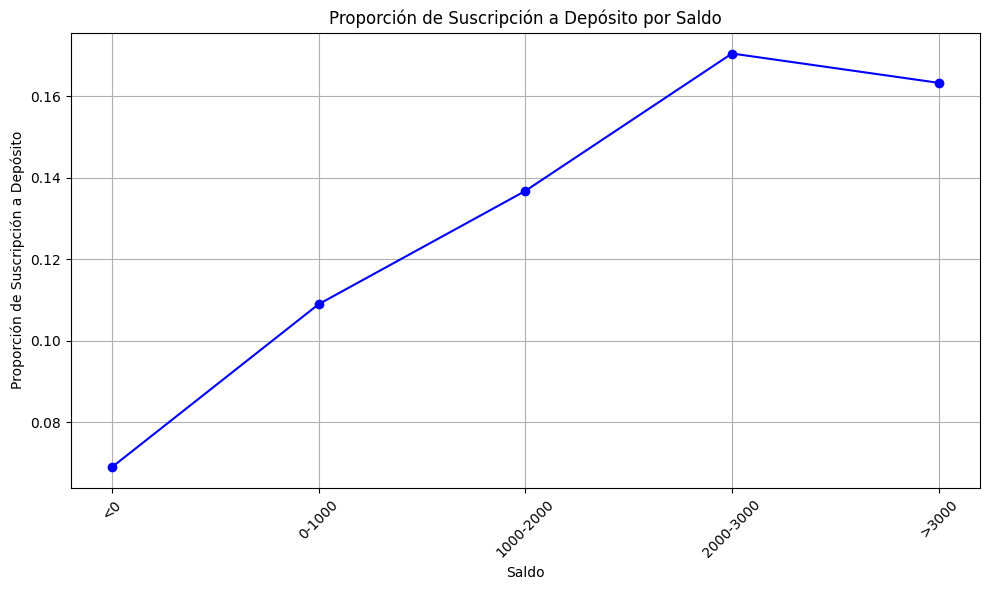

In [ ]:
# Calcular la proporción de suscripciones a depósitos para cada intervalo de saldo
conversion_rate = cross_tab.apply(lambda row: row / row.sum(), axis=1)

# Crear una nueva columna en conversion_rate que represente la proporción de suscripción a depósito
conversion_rate['Proporción Suscripción a Depósito'] = conversion_rate['yes']

plt.figure(figsize=(10, 6))
plt.plot(conversion_rate.index, conversion_rate['Proporción Suscripción a Depósito'], marker='o', color='blue', linestyle='-')
plt.title('Proporción de Suscripción a Depósito por Saldo')
plt.xlabel('Saldo')
plt.ylabel('Proporción de Suscripción a Depósito')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#### *Housing*

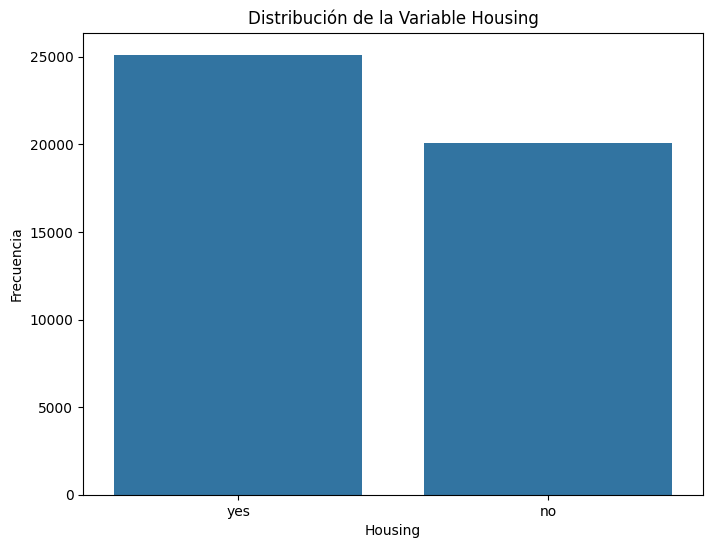

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='housing')
plt.xlabel('Housing')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Variable Housing')
plt.show()


<ipython-input-24-cb32746008e4>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='housing', y='conversion_rate', data=conversion_education, palette=colors)


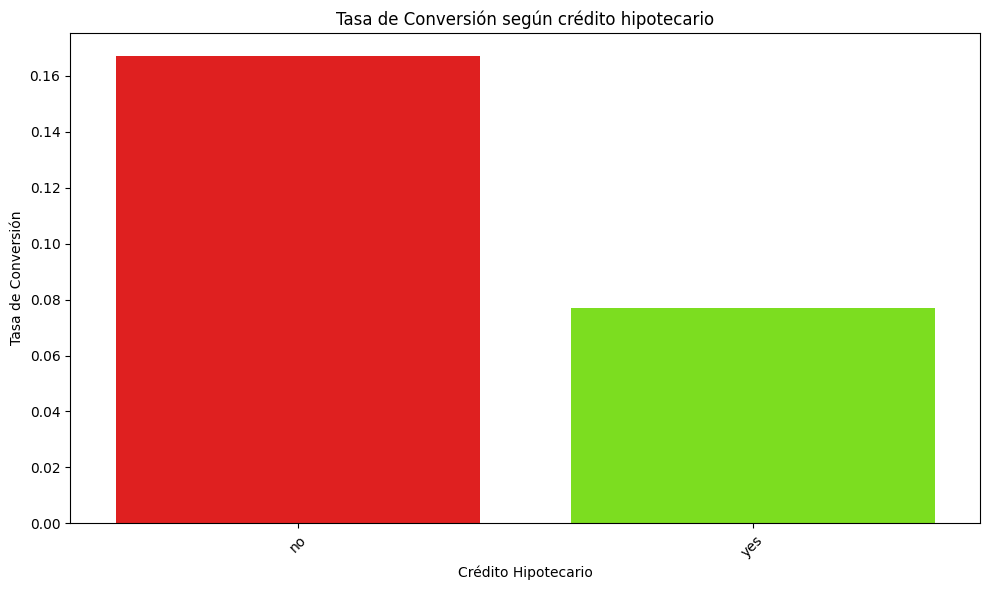

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la columna 'y' a tipo numérico
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Calcular la tasa de conversión
conversion_education = data.groupby('housing')['y'].mean().reset_index()

# Renombrar la columna para reflejar su significado
conversion_education = conversion_education.rename(columns={'y': 'conversion_rate'})

colors = ["#FF0000", "#7CFC00"]

plt.figure(figsize=(10, 6))
sns.barplot(x='housing', y='conversion_rate', data=conversion_education, palette=colors)
plt.title('Tasa de Conversión según crédito hipotecario')
plt.xlabel('Crédito Hipotecario')
plt.ylabel('Tasa de Conversión')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### *Loan*

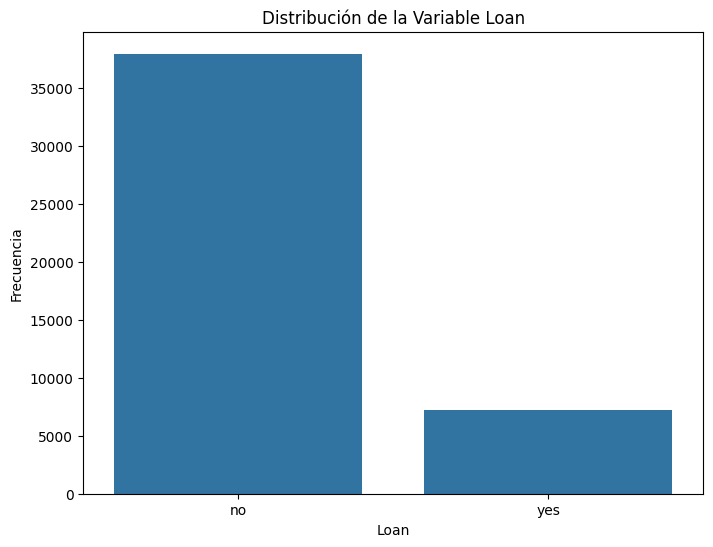

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='loan')
plt.xlabel('Loan')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Variable Loan')
plt.show()

<ipython-input-29-49f71197d2da>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loan', y='conversion_rate', data=conversion_education, palette=colors)


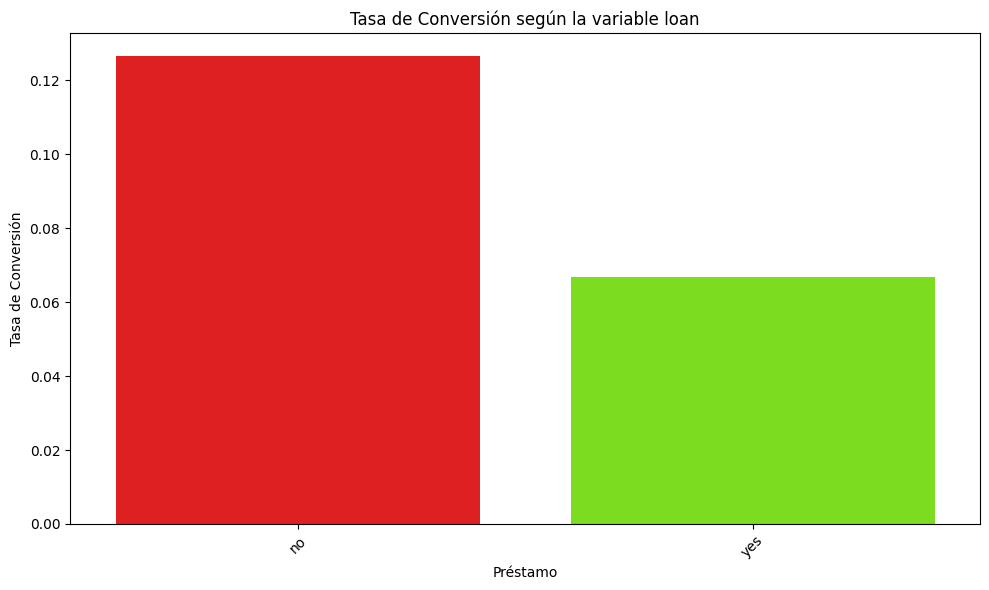

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convertir la columna 'y' a tipo numérico
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Calcular la tasa de conversión por nivel educativo
conversion_loan = data.groupby('loan')['y'].mean().reset_index()
conversion_loan = conversion_loan.rename(columns={'y': 'conversion_rate'})

colors = ["#FF0000", "#7CFC00"]

# Crear un gráfico de barras para la tasa de conversión por nivel educativo
plt.figure(figsize=(10, 6))
sns.barplot(x='loan', y='conversion_rate', data=conversion_loan, palette=colors)
plt.title('Tasa de Conversión según la variable ''loan''')
plt.xlabel('Préstamo')
plt.ylabel('Tasa de Conversión')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### *Contact*

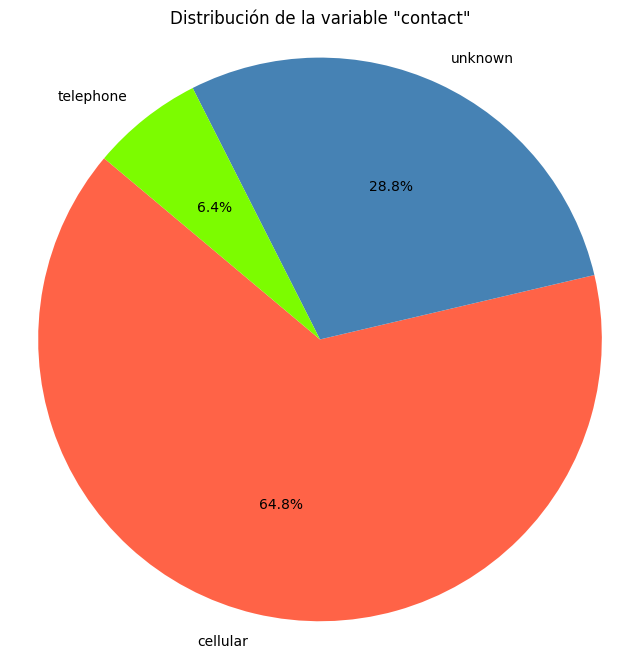

In [ ]:
import matplotlib.pyplot as plt

contact_counts = data['contact'].value_counts()

# Obtener los nombres de las categorías y sus frecuencias
labels = contact_counts.index
sizes = contact_counts.values

colors = ['#FF6347', '#4682B4', '#7CFC00']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribución de la variable "contact"')
plt.show()


#### *Day*

<ipython-input-13-849c9dab11d0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='day', palette=palette)


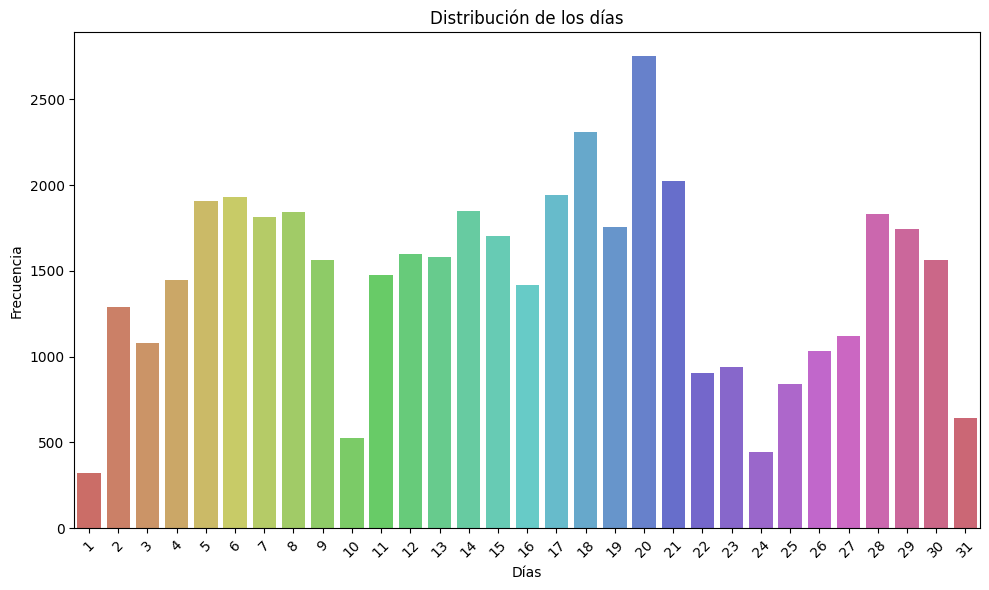

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("hls", 31)

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='day', palette=palette)
plt.xlabel('Días')
plt.ylabel('Frecuencia')
plt.title('Distribución de los días')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### *Month*

<ipython-input-11-ae77fa19c6dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='month', palette=palette)


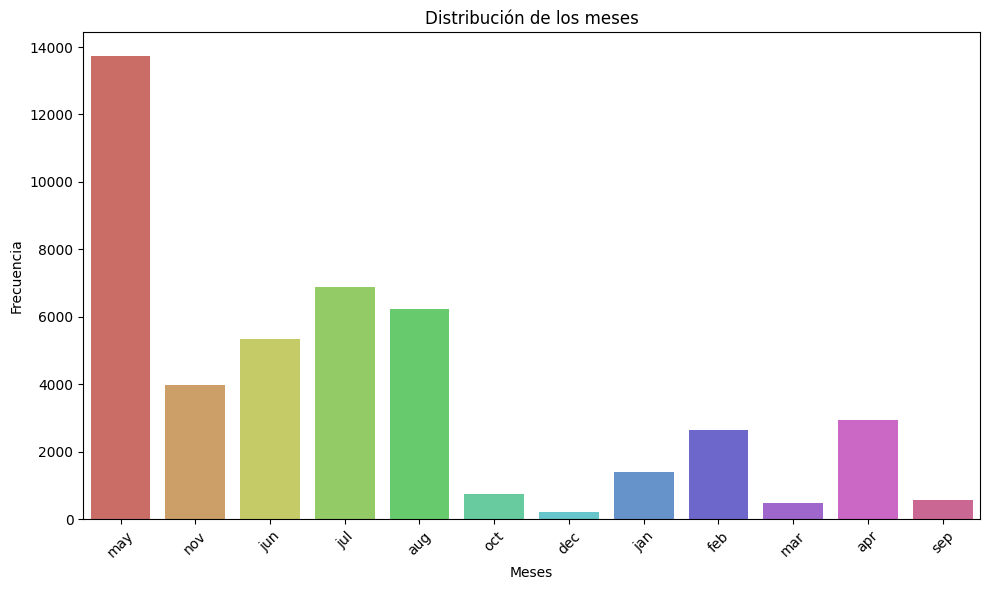

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("hls", 12)

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='month', palette=palette)
plt.xlabel('Meses')
plt.ylabel('Frecuencia')
plt.title('Distribución de los meses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### *Duration*

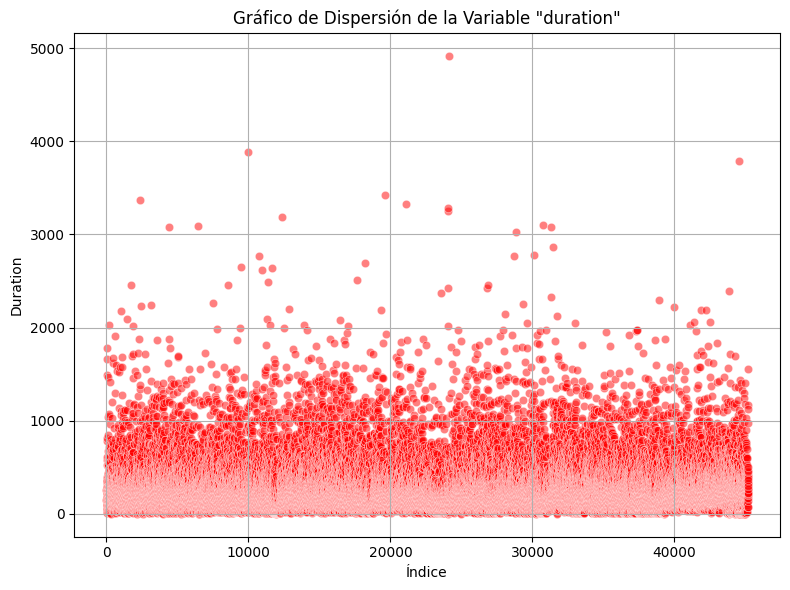

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x=data.index, y='duration', color='red', alpha=0.5)
plt.title('Gráfico de Dispersión de la Variable "duration"')
plt.xlabel('Índice')
plt.ylabel('Duration')
plt.grid(True)
plt.tight_layout()
plt.show()


#### *Campaign*

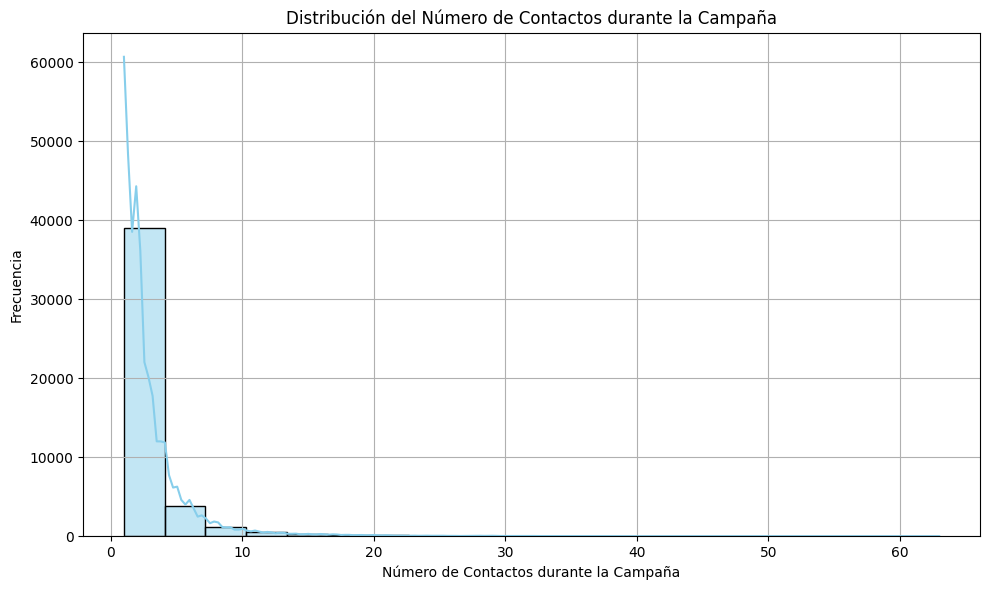

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='campaign', bins=20, kde=True, color='skyblue')
plt.xlabel('Número de Contactos durante la Campaña')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Contactos durante la Campaña')
plt.grid(True)
plt.tight_layout()
plt.show()


#### *Pdays*

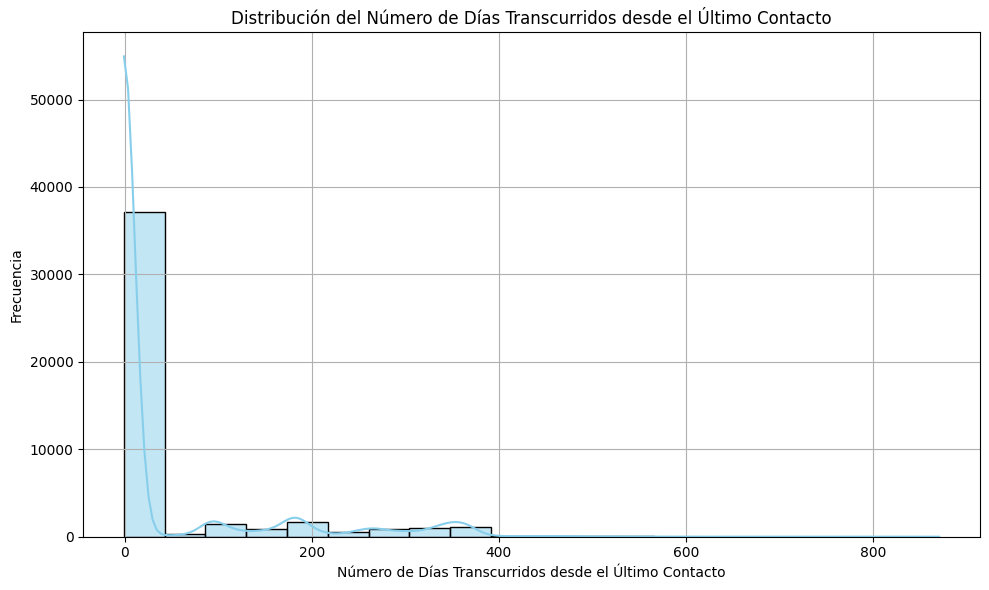

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='pdays', bins=20, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Número de Días Transcurridos desde el Último Contacto')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Días Transcurridos desde el Último Contacto')
plt.grid(True)
plt.tight_layout()
plt.show()


#### *Previous Contact*

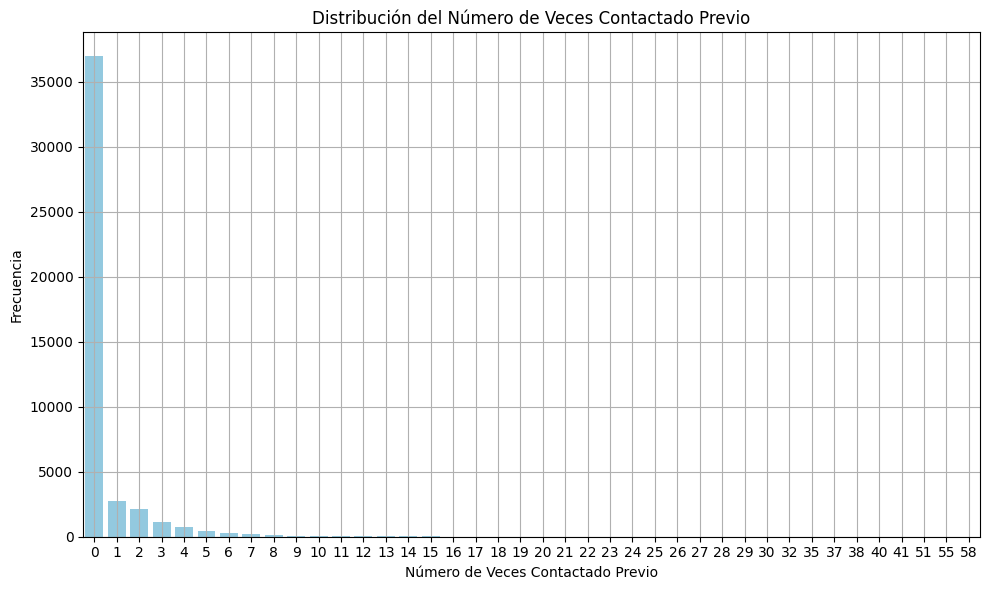

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='previous', color='skyblue')
plt.xlabel('Número de Veces Contactado Previo')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Veces Contactado Previo')
plt.grid(True)
plt.tight_layout()
plt.show()


#### *Poutcome*

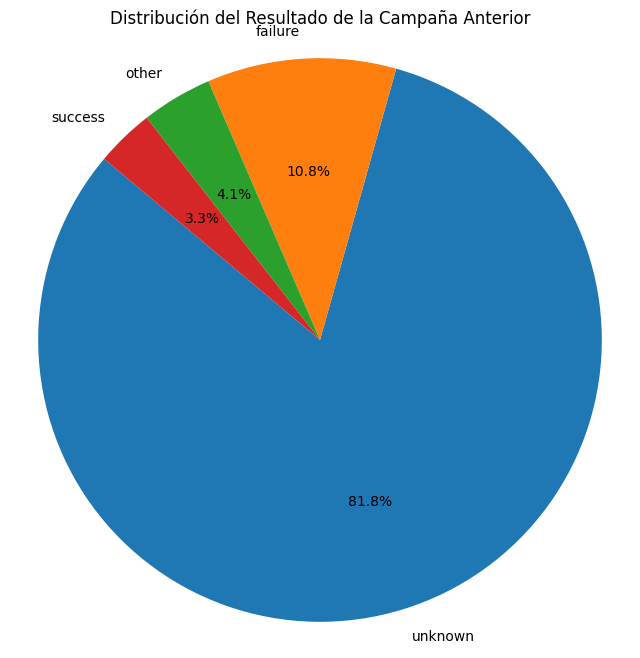

In [ ]:
poutcome_counts = data['poutcome'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(poutcome_counts, labels=poutcome_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución del Resultado de la Campaña Anterior')
plt.axis('equal')
plt.show()


## Análisis bivariante

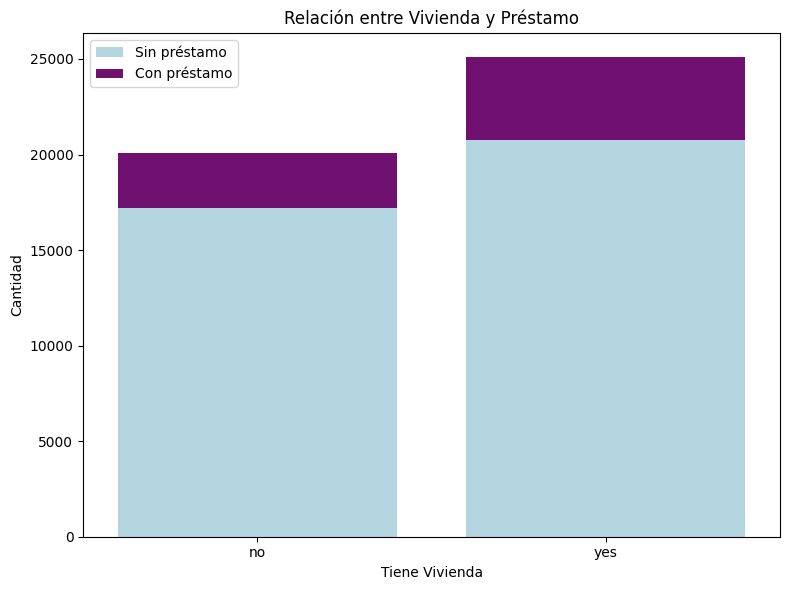

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cross_tab = pd.crosstab(index=data['housing'], columns=data['loan'])

plt.figure(figsize=(8, 6))
sns.barplot(x=cross_tab.index, y=cross_tab.iloc[:,0], color='lightblue', label='Sin préstamo')
sns.barplot(x=cross_tab.index, y=cross_tab.iloc[:,1], color='purple', bottom=cross_tab.iloc[:,0], label='Con préstamo')
plt.xlabel('Tiene Vivienda')
plt.ylabel('Cantidad')
plt.title('Relación entre Vivienda y Préstamo')
plt.legend()
plt.tight_layout()
plt.show()


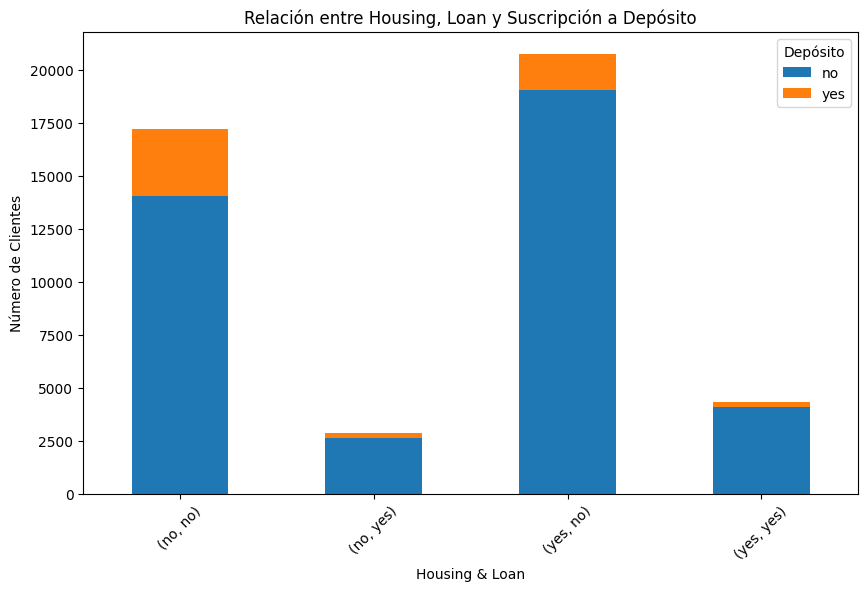

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una tabla de contingencia entre housing y loan con respecto a la variable y
cross_tab = pd.crosstab(index=[data['housing'], data['loan']], columns=data['y'])

# Graficar el gráfico de barras apiladas
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relación entre Housing, Loan y Suscripción a Depósito')
plt.xlabel('Housing & Loan')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.legend(title='Depósito')
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia entre housing, loan y la variable a predecir y
cross_tab = pd.crosstab(index=[data['housing'], data['loan']], columns=data['y'])

# Realizar la prueba de chi-cuadrado
chi2, p, _, _ = chi2_contingency(cross_tab)

print(f'Chi-cuadrado: {chi2}')
print(f'Valor p: {p}')


Chi-cuadrado: 1156.2641544970102
Valor p: 2.2608551975707197e-250


El resultado de la prueba de chi-cuadrado muestra un estadístico de chi-cuadrado de aproximadamente 1156.26 y un valor p extremadamente bajo, de alrededor de 2.26e-250. Esto sugiere una asociación altamente significativa entre las variables "housing", "loan" y la suscripción a un depósito a término. En otras palabras, la presencia de crédito hipotecario y/o créditos de consumo parece estar fuertemente relacionada con la decisión de suscribirse a un depósito a término.

## Análisis multivariante

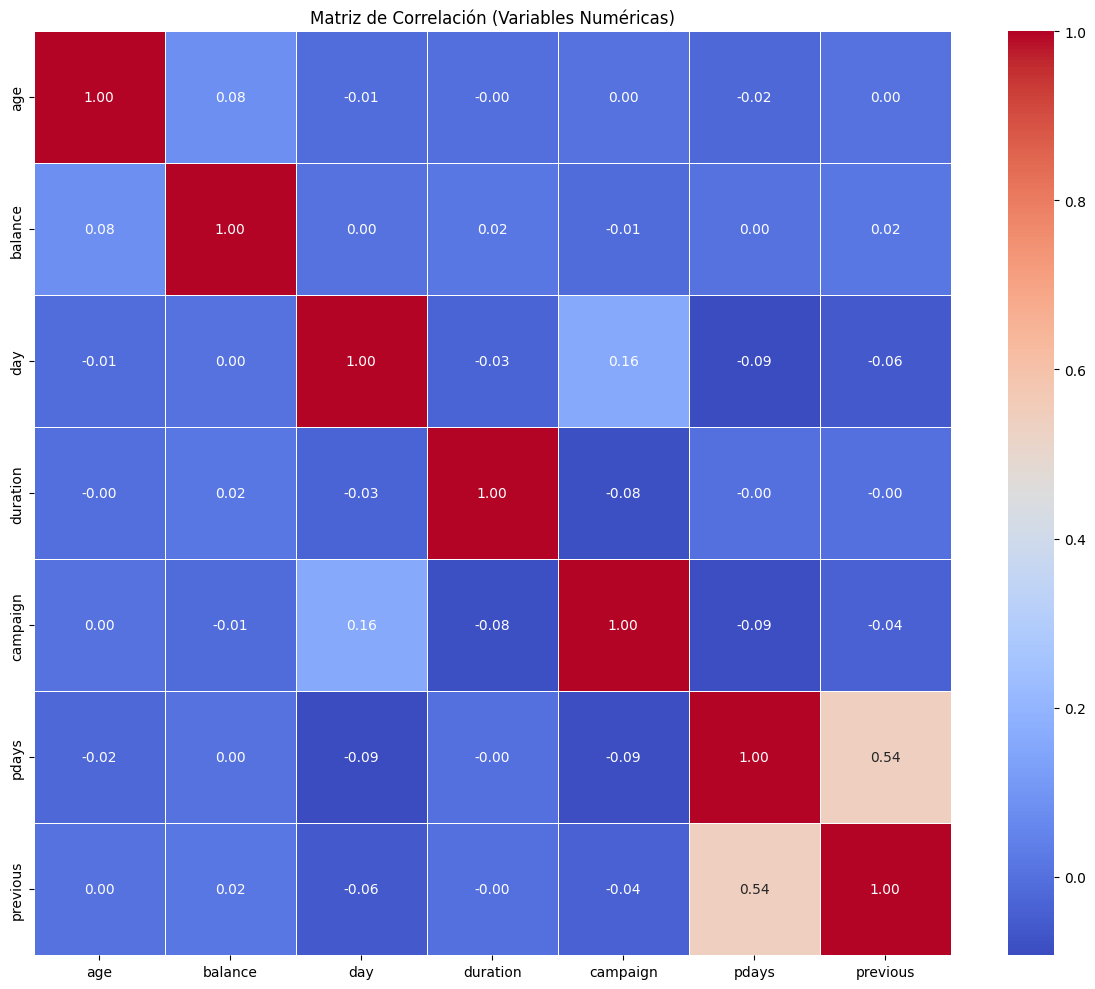

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ruta del archivo CSV
ruta = "/content/dataset_banco_clean.csv"

# Leer el archivo CSV en un DataFrame
data = pd.read_csv(ruta)

# Eliminar variables categóricas del DataFrame
data_numeric = data.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = data_numeric.corr()

# Crear un heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación (Variables Numéricas)')
plt.tight_layout()
plt.show()


 Este mapa de calor muestra las relaciones entre diferentes variables de nuestro conjunto de datos. Cada celda del mapa de calor representa la correlación entre dos variables específicas.

 El mapa de calor de correlaciones muestra las relaciones entre las variables del conjunto de datos. En particular, destaca una correlación positiva de 0.16 entre "day" y "campaign". Esto sugiere que, en promedio, a medida que el número del día del mes aumenta, también lo hace el número total de veces que una persona ha sido contactada durante la campaña. Podría interpretarse que, hacia fin de mes, la actividad de la campaña tiende a intensificarse.

Además, hay otra correlación significativa de 0.54 entre "previous" y "pdays". Esta correlación positiva indica que cuanto más tiempo haya pasado desde el último contacto previo a la campaña actual (representado por "pdays"), es más probable que el número de veces que la persona ha sido contactada antes de esta campaña (representado por "previous") sea mayor. Esto podría indicar que los clientes que fueron contactados con mayor antelación tienden a ser contactados con mayor frecuencia en campañas posteriores.

# Conclusiones

Un análisis exploratorio de datos es un paso crucial en cualquier proyecto de análisis de datos o modelado predictivo, ya que proporciona una comprensión profunda de los datos y ayuda a identificar las mejores estrategias para análisis posteriores.

Este estudio nos ofrece una primera visión de los datos y de cómo se relacionan entre sí las diferentes variables. Sin embargo, para obtener un entendimiento más completo y poder construir modelos predictivos precisos, sería necesario llevar a cabo análisis más exhaustivos,como por ejemplo,la selección de los modelos más adecuados y la evaluación del desempeño de dichos modelos. Por lo que este primer análisis nos da una idea inicial, pero para profundizar y obtener resultados más sólidos, se requiere un trabajo más detallado y especializado.